In [1]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read json file
with open("data/gpt-4o_fast_500 times.json", "r", encoding="utf-8") as file:
    data=json.load(file)

# extract "responses" from the file
responses=data["responses"] 

# 确保每个响应是字典而非字符串
parsed_responses=[]
for response in responses:
    if isinstance(response, str):  # if it is a string, then parse it into dictionary
        try:
            parsed_responses.append(json.loads(response))
        except json.JSONDecodeError:
            print("无法解析响应为JSON：", response) # catch errors by "try-excpet"
    elif isinstance(response, dict):  # for the situation that it has already been dictonary
        parsed_responses.append(response)

print(parsed_responses)

无法解析响应为JSON： ```
**Sorted Options:**
1. a
2. e
3. d
4. b
5. c

**Reasoning:**
1. **Reasons for Selection Order:** The description of Linda aligns more closely with feminist activities due to her involvement in social justice, making her being active in the feminist movement seem most likely. The inclusion of either feminist or bank teller covers both major life possibilities from the list, ranking it next. Linda being active in the feminist movement but not working as a bank teller suggests her primary focus is on activism, ranking it over just working at a bank. Working solely as a bank teller feels less connected to her described interests. Lastly, the conjunction of being both a feminist and a bank teller is least probable due to the conjunction fallacy; it's less likely for two events to occur together than separately.
2. **Reasoning Steps:** I used Linda's background and interests to predict her most likely behaviors. The feminist movement aligns with her past activities, and I th

In [7]:
# extract the option from responses
sorted_options = []
for response in responses:
    if "**Sorted Options:**" in response:
        sorted_part=response.split("**Sorted Options:**")[1].split("\n\n")[0].strip() # extract the content after "**Sorted Options:**" but before "\n\n"
        orders=[line.split(".")[1].strip() for line in sorted_part.split("\n")] # extract options
        sorted_options.append(orders)

# Create a counter at each ordinal position and count the number of times the option appears in each position
orders_counts= {order: Counter() for order in range(1, 7)}
for orders in sorted_options:
    for i, option in enumerate(orders, 1):
        orders_counts[i][option]+=1
orders_counts

{1: Counter({'a': 498,
          'No explanation is required in this section': 1,
          'e': 1}),
 2: Counter({'e': 207, 'd': 188, 'c': 103, 'a': 2}),
 3: Counter({'d': 246, 'e': 228, 'c': 26}),
 4: Counter({'b': 215, 'c': 156, 'd': 65, 'e': 64}),
 5: Counter({'b': 284, 'c': 215, 'd': 1}),
 6: Counter({'b': 1})}

In [23]:
# create a dataframe
orders_data= {f"Order {order}": dict(counts) for order, counts in orders_counts.items()}
df= pd.DataFrame(orders_data).fillna(0)

df1= df.T # tranpose the row and column
df1=df1.drop("No explanation is required in this section",axis=1).drop("Order 6")
df1

,a,e,c,d,b
Order 1,498.0,1.0,0.0,0.0,0.0
Order 2,2.0,207.0,103.0,188.0,0.0
Order 3,0.0,228.0,26.0,246.0,0.0
Order 4,0.0,64.0,156.0,65.0,215.0
Order 5,0.0,0.0,215.0,1.0,284.0


In [29]:
#caculate the conjunction and disjunction error
conjunction_fallacy_count= 0  
disjunction_fallacy_count= 0         
total_responses= len(sorted_options)

for orders in sorted_options:
    if orders.index('c') < orders.index('b'):
        conjunction_fallacy_count +=1

    if orders.index('a') < orders.index('e'):
        disjunction_fallacy_count +=1


conjunction_fallacy_prob= "%.2f%%"%((conjunction_fallacy_count / total_responses)*100)
disjunction_fallacy_prob= "%.2f%%"%((disjunction_fallacy_count / total_responses)*100)


print("The probability of conjunction fallacy is:",conjunction_fallacy_prob)
print("The probability of disjunction fallacy is:",disjunction_fallacy_prob)

The probability of conjunction fallacy is: 57.20%
The probability of disjunction fallacy is: 99.80%


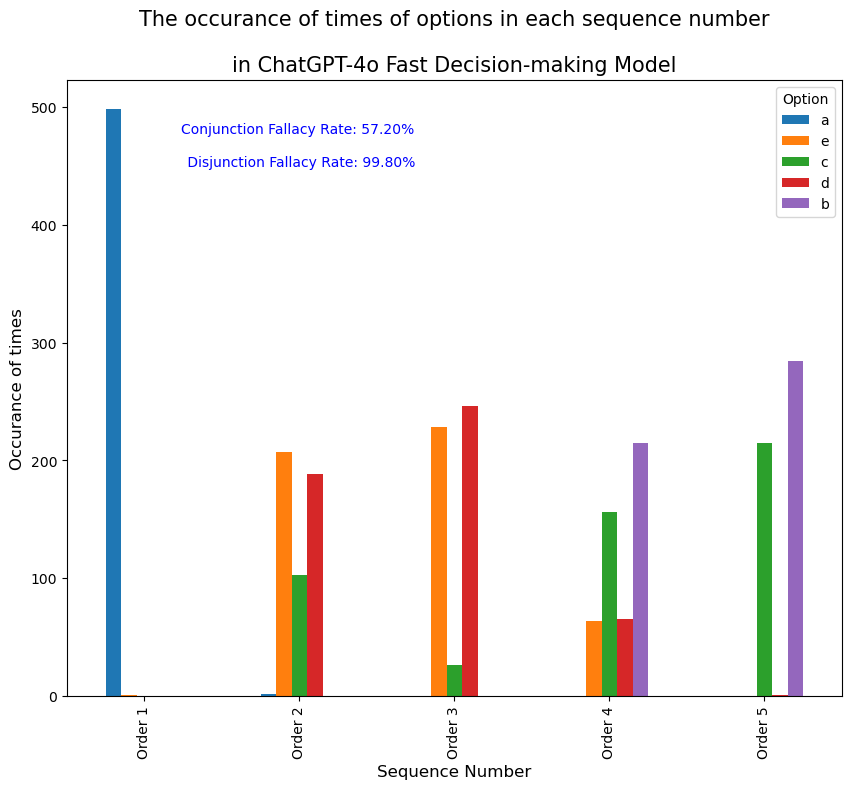

In [31]:
df1.plot(kind="bar", figsize=(10, 8))
plt.title("The occurance of times of options in each sequence number\n\nin ChatGPT-4o Fast Decision-making Model",fontsize=15)
plt.xlabel("Sequence Number",fontsize=12)
plt.ylabel("Occurance of times",fontsize=12)
plt.legend(title="Option")
plt.text(1,450,"Conjunction Fallacy Rate: 57.20% \n\n Disjunction Fallacy Rate: 99.80%",ha="center",fontdict={"color":"blue"})
plt.savefig("Figure/ChatGPT-4o Fast Decision-making Model.jpg",dpi=600)
plt.show()